In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(1), int64(13)
m

In [3]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,53.667500,0.662500,1.712500,123.630000,216.627500,0.140000,0.530000,146.717500,0.29250,0.753250,1.177500,0.677500,1.925000,0.555000
std,8.508403,0.473449,1.035628,16.567114,41.379941,0.347422,0.533678,21.104293,0.45548,0.772841,0.645784,0.889084,0.689611,0.497588
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,91.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,112.000000,188.000000,0.000000,0.000000,132.000000,0.00000,0.200000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,2.000000,124.000000,216.000000,0.000000,1.000000,146.000000,0.00000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,3.000000,135.000000,246.000000,0.000000,1.000000,161.000000,1.00000,0.900000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,174.000000,336.000000,1.000000,2.000000,202.000000,1.00000,4.900000,2.000000,3.000000,3.000000,1.000000


In [4]:
df['heart_disease'].value_counts()

,count
heart_disease,
1,222
0,178


In [5]:
# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Data types of each column:
age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
heart_disease                int64
dtype: object

Missing values in each column:
age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
heart_disease              0
dtype: int64


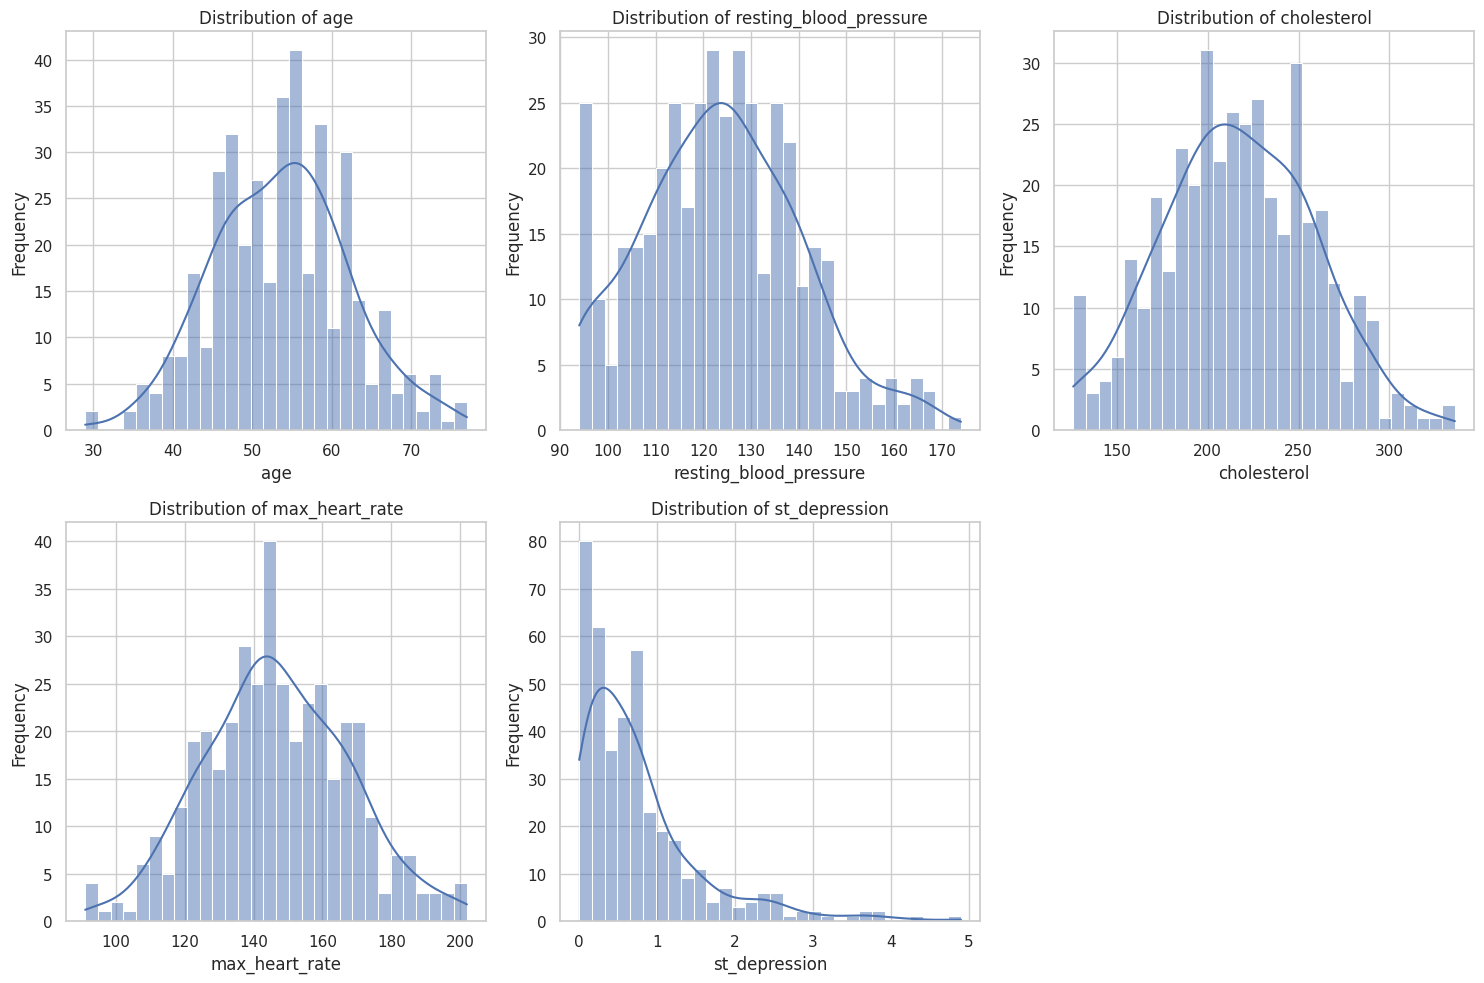

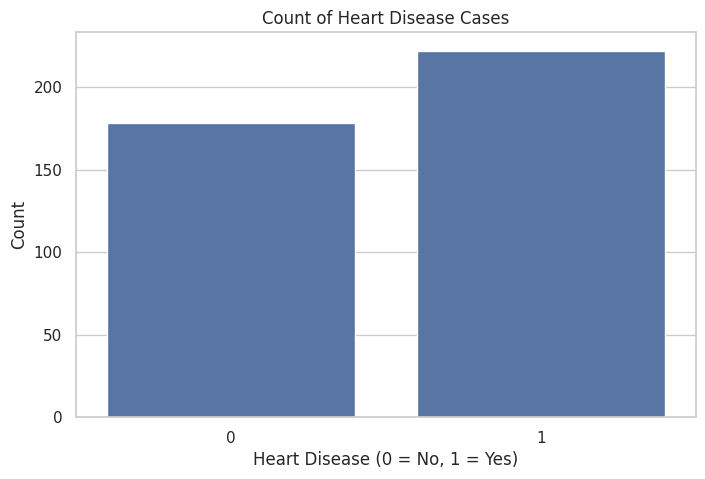

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create histograms for numerical features
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create a count plot for the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='heart_disease', data=df)
plt.title('Count of Heart Disease Cases')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

1.2.1 Analyze Target Variable Distribution

Use histograms or count plots to visualize the distribution of the target variable (e.g., heart disease presence).

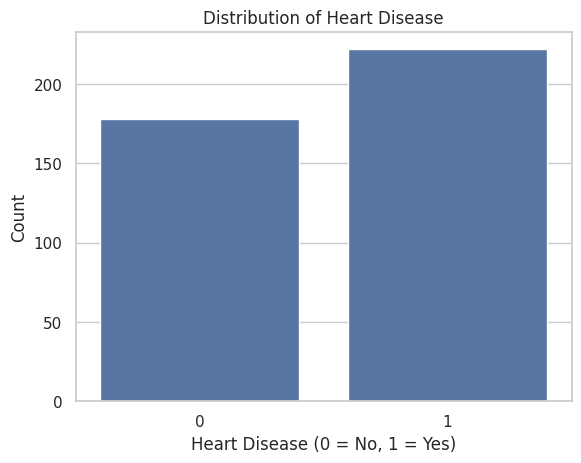

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='heart_disease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

1.2.2.Create Correlation Matrices and Heatmaps

Generate a correlation matrix to understand the relationships between numerical features and visualize it using a heatmap.

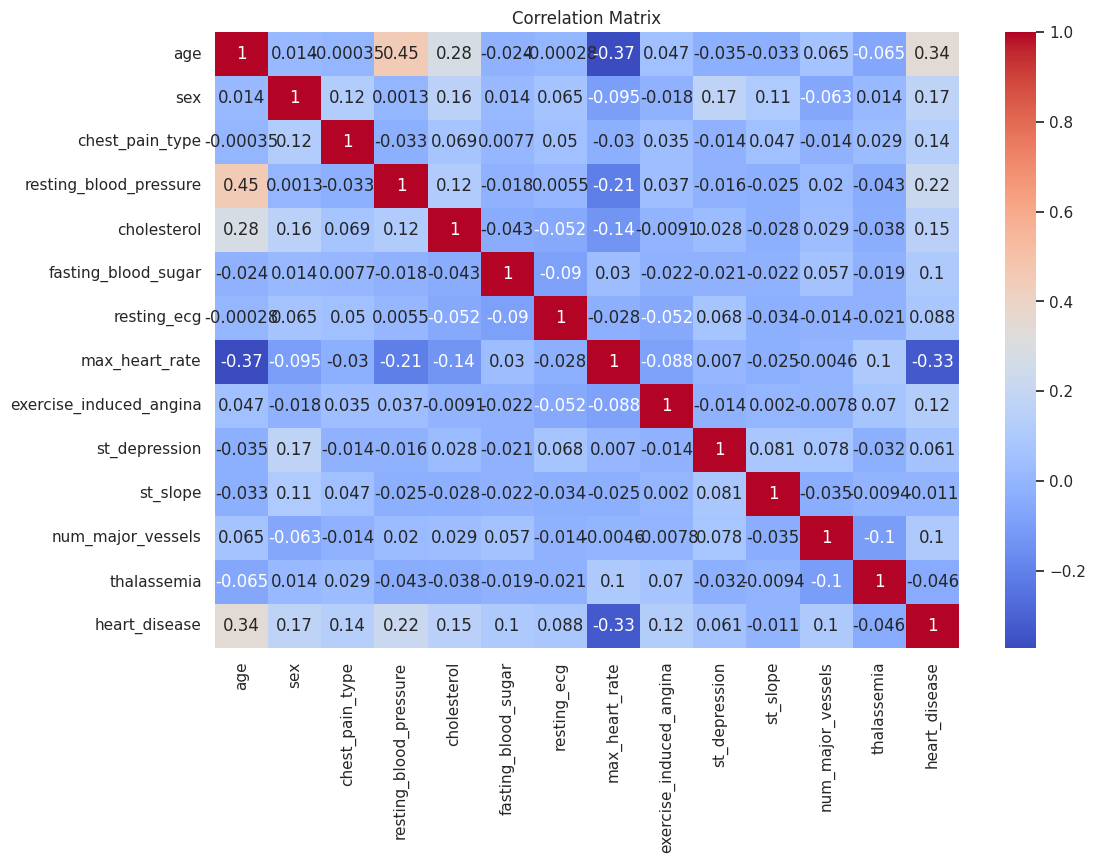

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1.2. 3. Generate Pair Plots for Continuous Variables

Use pair plots to visualize the relationships between continuous variables and the target variable.

In [9]:
# Display the column names in the DataFrame
print(df.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'heart_disease'],
      dtype='object')


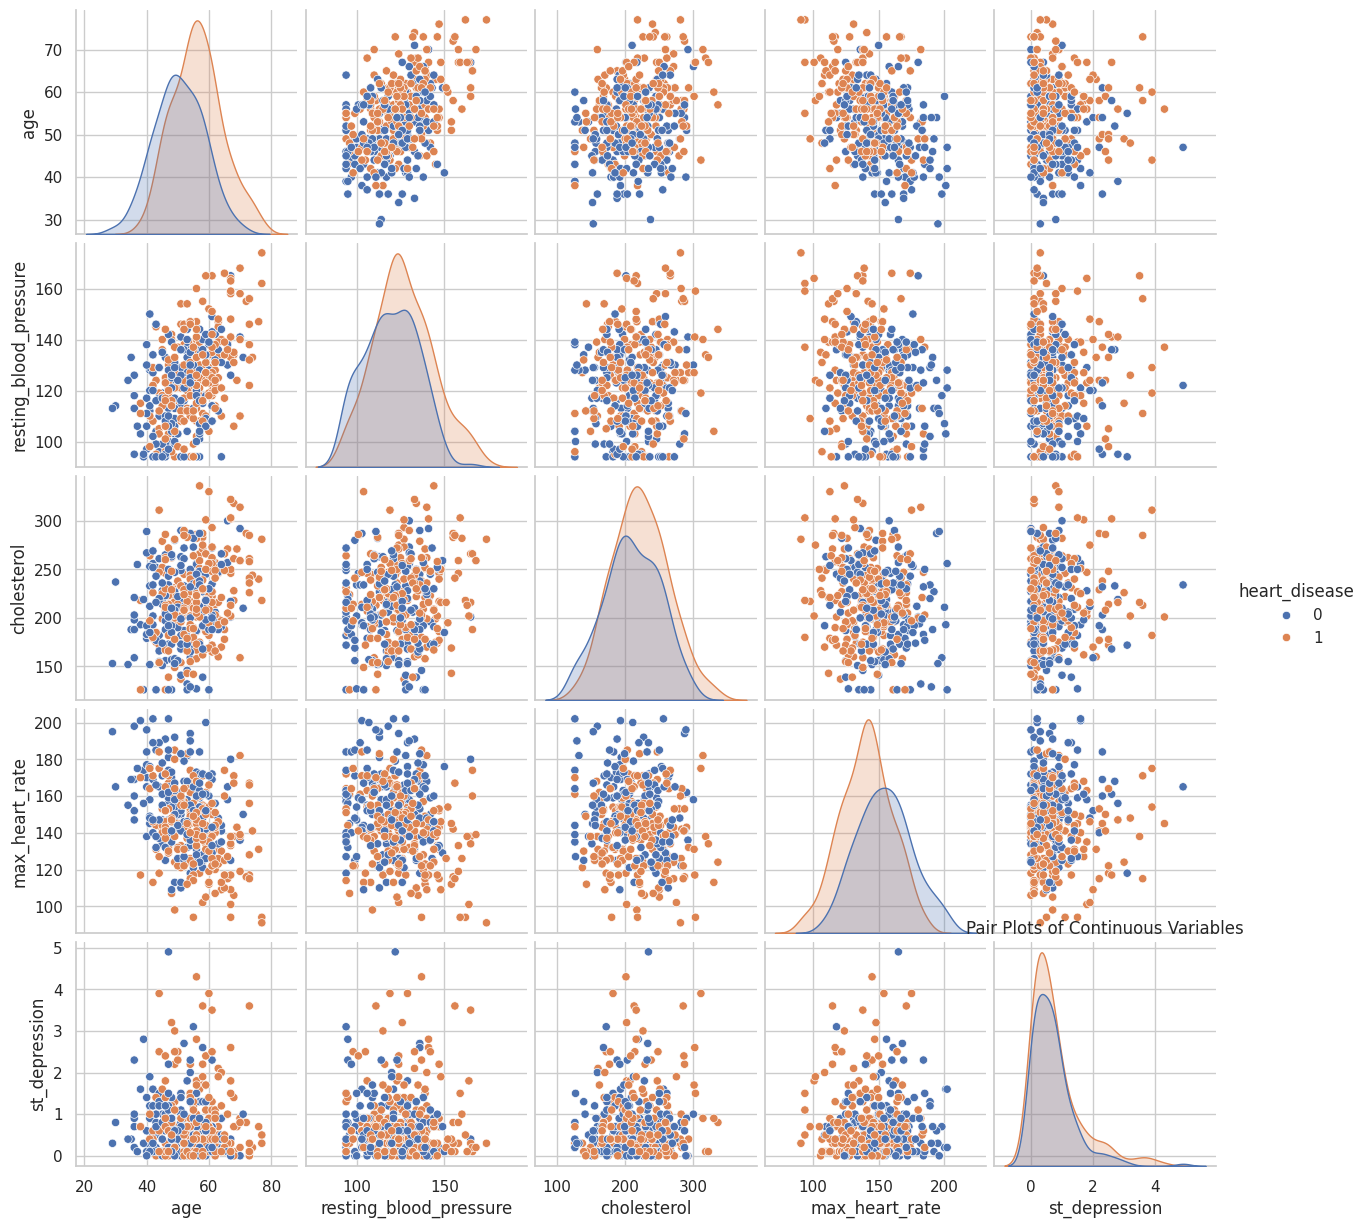

In [10]:
sns.pairplot(df, hue='heart_disease', vars=['age','resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression'])
plt.title('Pair Plots of Continuous Variables')
plt.show()

1.2.4. Examine Relationships Between Features and Target Variable

Create visualizations to explore how different features relate to the target variable, such as box plots or violin plots.

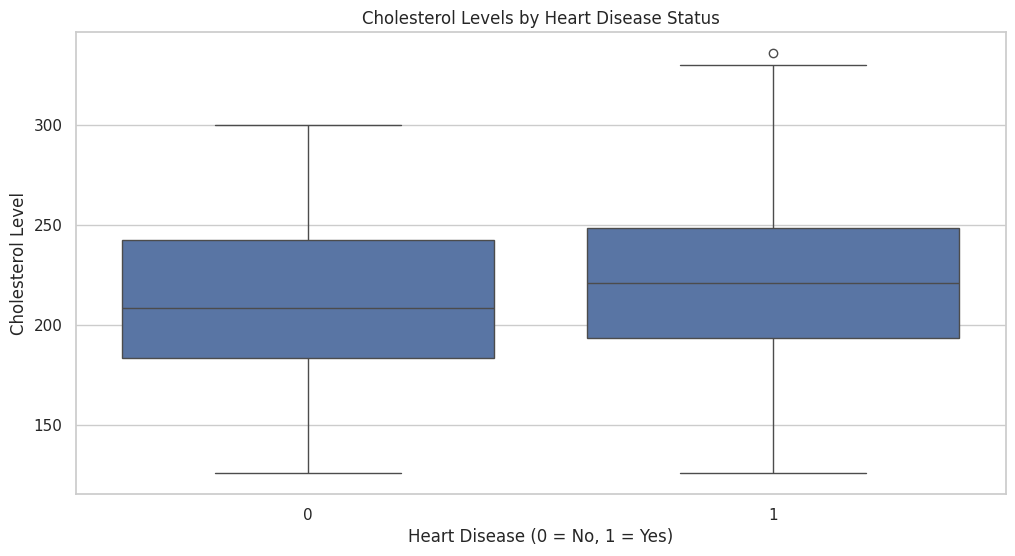

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='heart_disease', y='cholesterol', data=df)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

1.2.5. Identify Potential Outliers

Use box plots to visually identify outliers in numerical features.

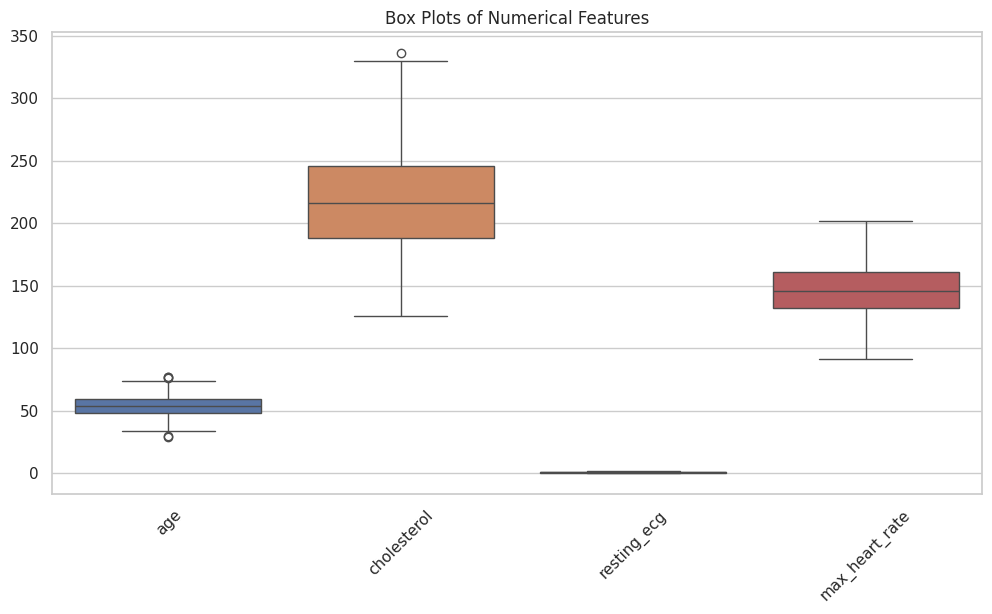

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'cholesterol', 'resting_ecg', 'max_heart_rate']])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

1.3 Data Preprocessing
1. Handle Missing Values
First, check if there are any missing values in your dataset. If there are, you can decide whether to fill them with a specific value (like the mean or median) or drop the rows/columns.


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handle missing values (example: fill with mean for numerical columns)
df.fillna(df.mean(), inplace=True)  # You can also use df.dropna() to drop missing values

Missing values in each column:
age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
heart_disease              0
dtype: int64


1.3.2. Encode Categorical Variables Appropriately
If your dataset contains categorical variables, you need to encode them into numerical format. You can use techniques like one-hot encoding or label encoding.

In [14]:
# Display the data types of each column
print(df.dtypes)

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
heart_disease                int64
dtype: object


In [15]:
print(df.columns)
print(df.head)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'heart_disease'],
      dtype='object')
<bound method NDFrame.head of      age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     58    1                1                     134          246   
1     52    0                2                     112          245   
2     59    0                2                     126          196   
3     67    1                1                     165          201   
4     51    1                0                     146          174   
..   ...  ...              ...                     ...          ...   
395   49    1                1                     133          178   
396   38    1                3                     111          126   
397   66    1                1           

1.3.3 Scale/Normalize Features for Algorithms That Require It
Some algorithms (like KNN, SVM, etc.) require feature scaling. You can use StandardScaler or MinMaxScaler from sklearn.

In [16]:
print(df.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'heart_disease'],
      dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']  # Update with actual numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

1.3.4. Split Data into Training and Testing Sets (80/20 Split)
Finally, split your dataset into training and testing sets. This is crucial for evaluating the performance of your model.

In [18]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('heart_disease', axis=1)  # Replace with the actual target variable name
y = df['heart_disease']  # Replace with the actual target variable name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Phase 2: Baseline Model Development (Week 2)
2.1 Model Implementation
Implement four classification algorithms with default parameters:
1.	Decision Tree Classifier


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Initialize and fit the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

joblib.dump(dt_classifier, "heart_disease_model.pkl")

# Make predictions
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Results:")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

# Analyze feature importance
importances = dt_classifier.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Decision Tree Classifier Results:
[[15 19]
 [17 29]]
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        34
           1       0.60      0.63      0.62        46

    accuracy                           0.55        80
   macro avg       0.54      0.54      0.54        80
weighted avg       0.55      0.55      0.55        80

Feature Importance:
                    Feature  Importance
7            max_heart_rate    0.247692
3    resting_blood_pressure    0.144244
0                       age    0.144065
4               cholesterol    0.110757
2           chest_pain_type    0.082304
1                       sex    0.049028
12              thalassemia    0.041370
6               resting_ecg    0.039036
11        num_major_vessels    0.037826
9             st_depression    0.036163
8   exercise_induced_angina    0.035799
10                 st_slope    0.018772
5       fasting_blood_sugar    0.012942


2 Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Compare feature importance with Decision Tree
rf_importances = rf_classifier.feature_importances_
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(rf_feature_importance)

Random Forest Classifier Results:
[[18 16]
 [14 32]]
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        34
           1       0.67      0.70      0.68        46

    accuracy                           0.62        80
   macro avg       0.61      0.61      0.61        80
weighted avg       0.62      0.62      0.62        80

Random Forest Feature Importance:
                    Feature  Importance
7            max_heart_rate    0.208971
0                       age    0.159600
4               cholesterol    0.132026
3    resting_blood_pressure    0.125828
9             st_depression    0.087009
2           chest_pain_type    0.060718
11        num_major_vessels    0.045656
12              thalassemia    0.040753
10                 st_slope    0.036406
1                       sex    0.029168
8   exercise_induced_angina    0.028800
6               resting_ecg    0.027427
5       fasting_blood_sugar    0.017637


3 Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_classifier.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(confusion_matrix(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

# Interpret coefficients
coefficients = logistic_classifier.coef_[0]
feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print("Logistic Regression Coefficients:")
print(feature_coefficients)

Logistic Regression Results:
[[26  8]
 [16 30]]
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        34
           1       0.79      0.65      0.71        46

    accuracy                           0.70        80
   macro avg       0.70      0.71      0.70        80
weighted avg       0.72      0.70      0.70        80

Logistic Regression Coefficients:
                    Feature  Coefficient
0                       age     0.528598
1                       sex     0.363015
2           chest_pain_type     0.276857
3    resting_blood_pressure     0.145548
4               cholesterol     0.200898
5       fasting_blood_sugar     0.726572
6               resting_ecg     0.278409
7            max_heart_rate    -0.684733
8   exercise_induced_angina     0.608939
9             st_depression     0.008860
10                 st_slope    -0.028856
11        num_major_vessels     0.317365
12              thalassemia    -0.023938


4 SVM

In [22]:
from sklearn.svm import SVC

# Initialize and fit the model with a linear kernel
svm_classifier_linear = SVC(kernel='linear', random_state=42)
svm_classifier_linear.fit(X_train, y_train)

# Make predictions
svm_predictions_linear = svm_classifier_linear.predict(X_test)

# Evaluate the model
print("SVM with Linear Kernel Results:")
print(confusion_matrix(y_test, svm_predictions_linear))
print(classification_report(y_test, svm_predictions_linear))

# Experiment with a different kernel (e.g., RBF)
svm_classifier_rbf = SVC(kernel='rbf', random_state=42)
svm_classifier_rbf.fit(X_train, y_train)

# Make predictions
svm_predictions_rbf = svm_classifier_rbf.predict(X_test)

# Evaluate the model
print("SVM with RBF Kernel Results:")
print(confusion_matrix(y_test, svm_predictions_rbf))
print(classification_report(y_test, svm_predictions_rbf))

SVM with Linear Kernel Results:
[[23 11]
 [15 31]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.64        34
           1       0.74      0.67      0.70        46

    accuracy                           0.68        80
   macro avg       0.67      0.68      0.67        80
weighted avg       0.68      0.68      0.68        80

SVM with RBF Kernel Results:
[[19 15]
 [12 34]]
              precision    recall  f1-score   support

           0       0.61      0.56      0.58        34
           1       0.69      0.74      0.72        46

    accuracy                           0.66        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.66      0.66      0.66        80



Understanding and Interpreting the Models
1 Decision Tree Classifier:

The tree structure can be visualized using plot_tree from sklearn.tree.
Feature importance indicates which features contribute most to the decision-making process.


2 Random Forest Classifier:

This model leverages multiple decision trees to improve accuracy and reduce overfitting.
Compare the feature importance from the Random Forest with that of the single Decision Tree to see how ensemble learning affects feature evaluation.


3 Logistic Regression:

The coefficients indicate the strength and direction of the relationship between each feature and the target variable.
Positive coefficients suggest a positive relationship, while negative coefficients suggest a negative relationship.

4 Support Vector Machine (SVM):

Experimenting with different kernels (linear, RBF, etc.) allows you to see how the decision boundary changes.
SVM aims to maximize the margin between classes, which can be visualized in lower-dimensional spaces.

2.2 Initial Model Evaluation
1. Import Necessary Libraries
Make sure to import the necessary libraries for evaluation:

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

2. Define a Function for Model Evaluation
You can create a function to evaluate each model and calculate the required metrics:

In [25]:
def evaluate_model(model, X, y):
    # Perform 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    roc_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    return {
        'Accuracy': accuracy.mean(),
        'Precision': precision.mean(),
        'Recall': recall.mean(),
        'F1-Score': f1.mean(),
        'ROC-AUC': roc_auc.mean()
    }

3. Evaluate Each Model
Now, you can evaluate each of the four models:

In [26]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_metrics = evaluate_model(dt_classifier, X, y)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_metrics = evaluate_model(rf_classifier, X, y)

# Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_metrics = evaluate_model(logistic_classifier, X, y)

# Support Vector Machine (SVM) with Linear Kernel
svm_classifier_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_metrics_linear = evaluate_model(svm_classifier_linear, X, y)

# Support Vector Machine (SVM) with RBF Kernel
svm_classifier_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_metrics_rbf = evaluate_model(svm_classifier_rbf, X, y)

# Compile results
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM (Linear)', 'SVM (RBF)'],
    'Accuracy': [dt_metrics['Accuracy'], rf_metrics['Accuracy'], logistic_metrics['Accuracy'], svm_metrics_linear['Accuracy'], svm_metrics_rbf['Accuracy']],
    'Precision': [dt_metrics['Precision'], rf_metrics['Precision'], logistic_metrics['Precision'], svm_metrics_linear['Precision'], svm_metrics_rbf['Precision']],
    'Recall': [dt_metrics['Recall'], rf_metrics['Recall'], logistic_metrics['Recall'], svm_metrics_linear['Recall'], svm_metrics_rbf['Recall']],
    'F1-Score': [dt_metrics['F1-Score'], rf_metrics['F1-Score'], logistic_metrics['F1-Score'], svm_metrics_linear['F1-Score'], svm_metrics_rbf['F1-Score']],
    'ROC-AUC': [dt_metrics['ROC-AUC'], rf_metrics['ROC-AUC'], logistic_metrics['ROC-AUC'], svm_metrics_linear['ROC-AUC'], svm_metrics_rbf['ROC-AUC']]
}

# Convert to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0        Decision Tree    0.5775   0.624139  0.603535  0.612603  0.574704
1        Random Forest    0.6700   0.690781  0.734242  0.710405  0.707551
2  Logistic Regression    0.6675   0.688885  0.730202  0.707873  0.742776
3         SVM (Linear)    0.6800   0.706489  0.725556  0.714381  0.742759
4            SVM (RBF)    0.6700   0.685656  0.748182  0.714983  0.709214


4. Create Confusion Matrices
You can create confusion matrices for each model using the predictions from the test set:

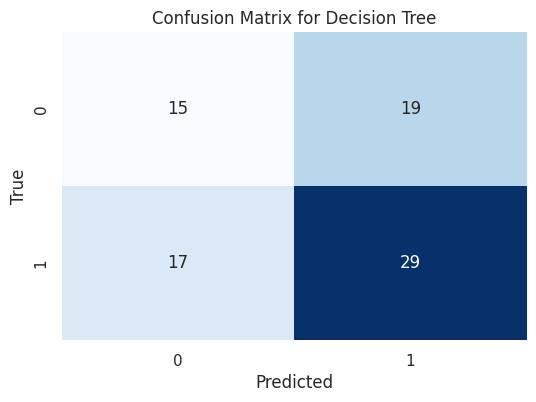

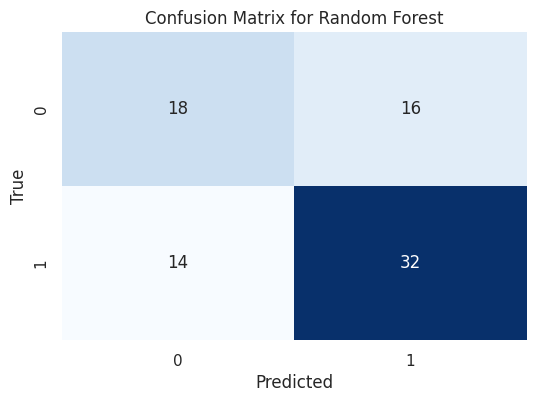

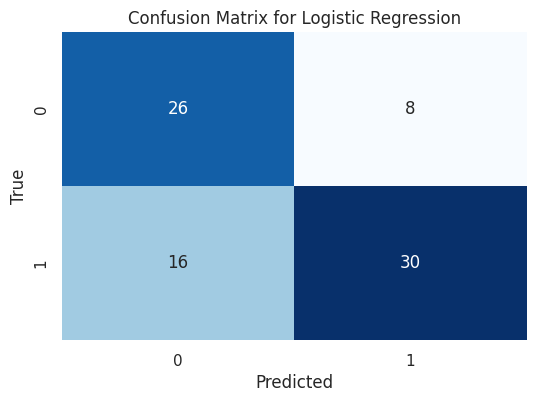

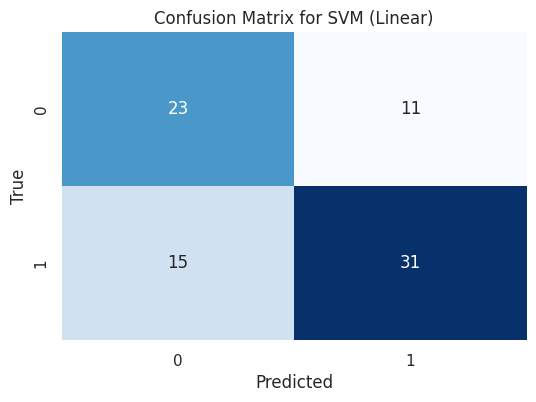

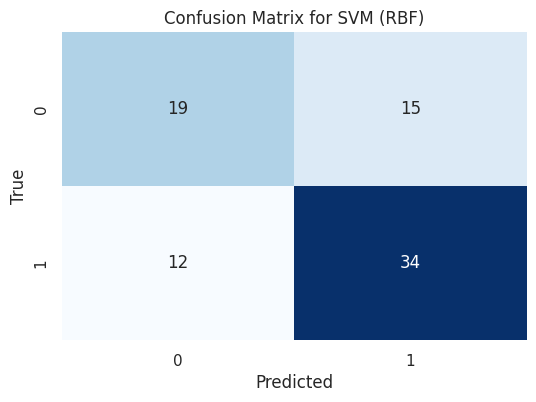

In [27]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Fit and predict for confusion matrices
for model, name in zip([dt_classifier, rf_classifier, logistic_classifier, svm_classifier_linear, svm_classifier_rbf],
                       ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM (Linear)', 'SVM (RBF)']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix for {name}')

5. Plot ROC Curves for Comparison
You can plot the ROC curves for each model to visualize their performance:

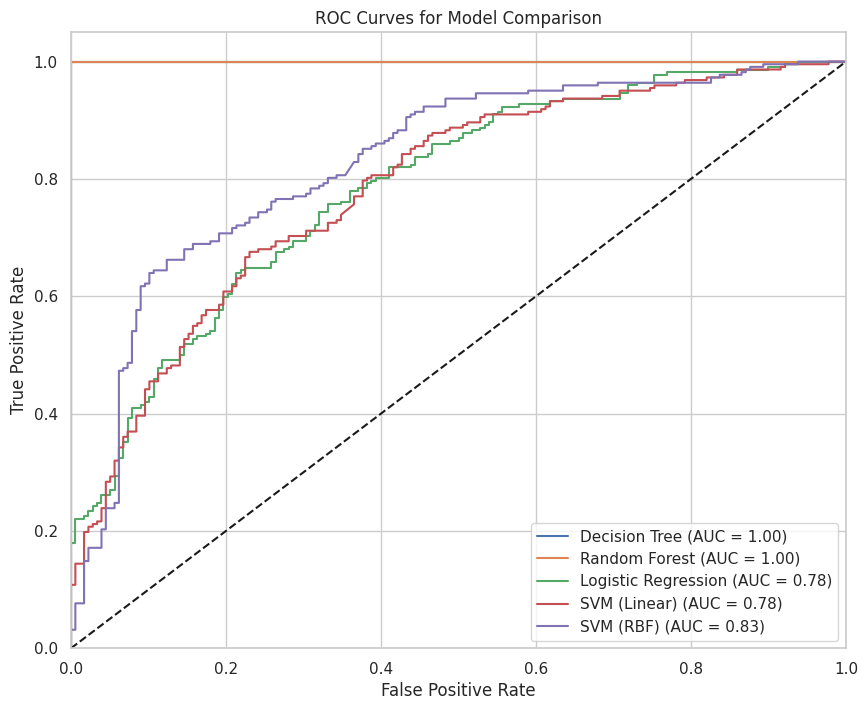

In [28]:
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(model, X, y, label):
    y_prob = model.predict_proba(X)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Fit models and plot ROC curves
for model, name in zip([dt_classifier, rf_classifier, logistic_classifier, svm_classifier_linear, svm_classifier_rbf],
                       ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM (Linear)', 'SVM (RBF)']):
    model.fit(X, y)
    plot_roc_curve(model, X, y, name)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Model Comparison')
plt.legend(loc='lower right')
plt.show()